In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import joblib
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [2]:

# Download NLTK stopwords if not already downloaded.
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Load the unique legal aid dataset.
dataset_path = "/content/legal_aid_dataset_unique.csv"
df = pd.read_csv(dataset_path)


<ipython-input-4-6f6615ce6cb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette="pastel")


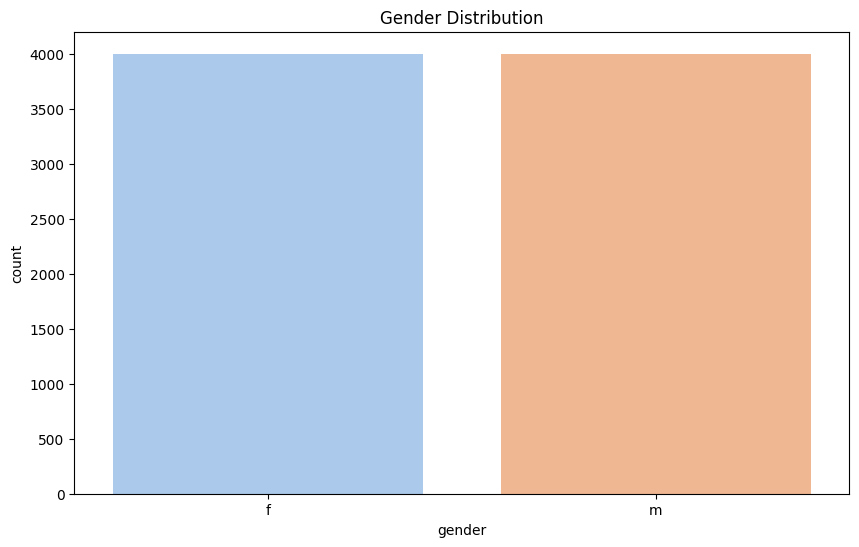

In [4]:

# 1. Gender Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='gender', palette="pastel")
plt.title("Gender Distribution")
plt.savefig("gender_distribution.png")
plt.show()


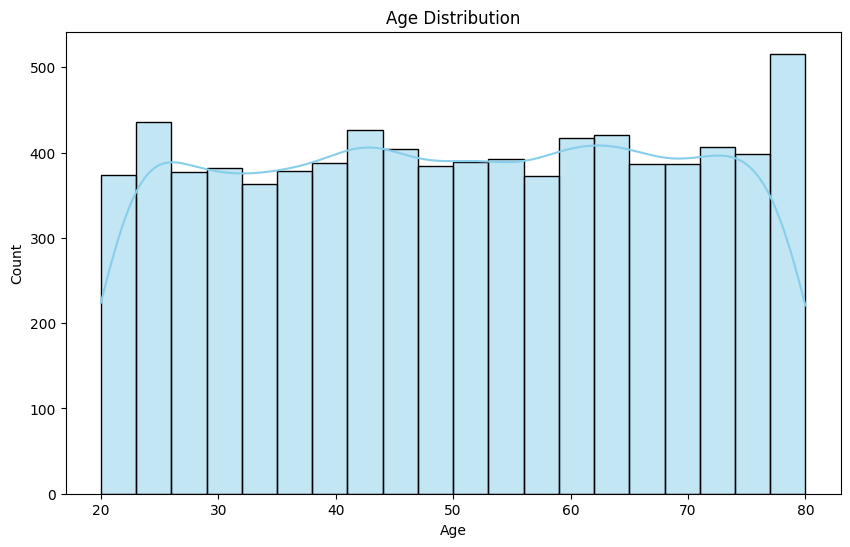

In [5]:

# 2. Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.savefig("age_distribution.png")
plt.show()


<ipython-input-6-09d4dbf9387e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")


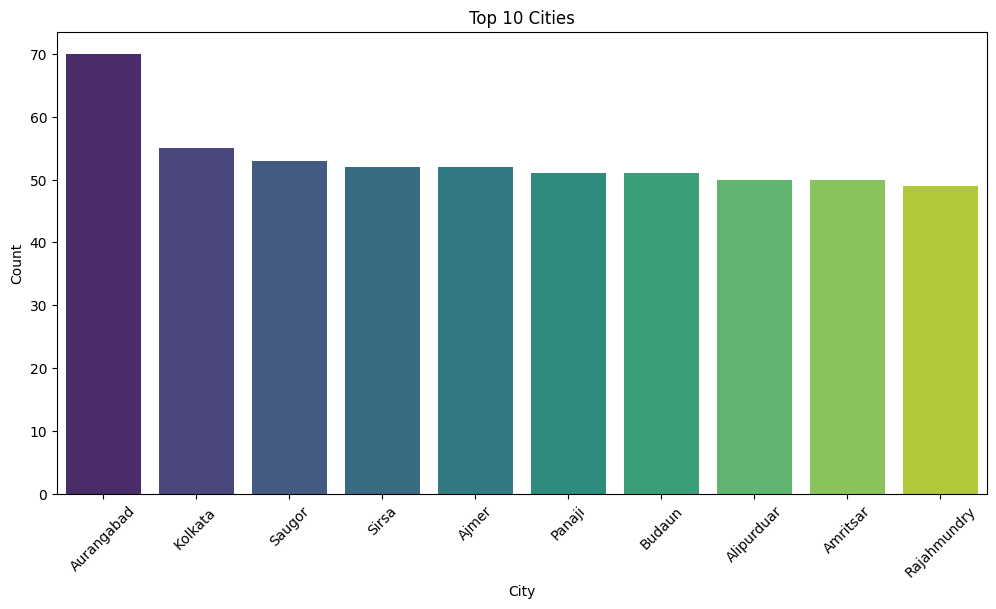

<ipython-input-6-09d4dbf9387e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="magma")


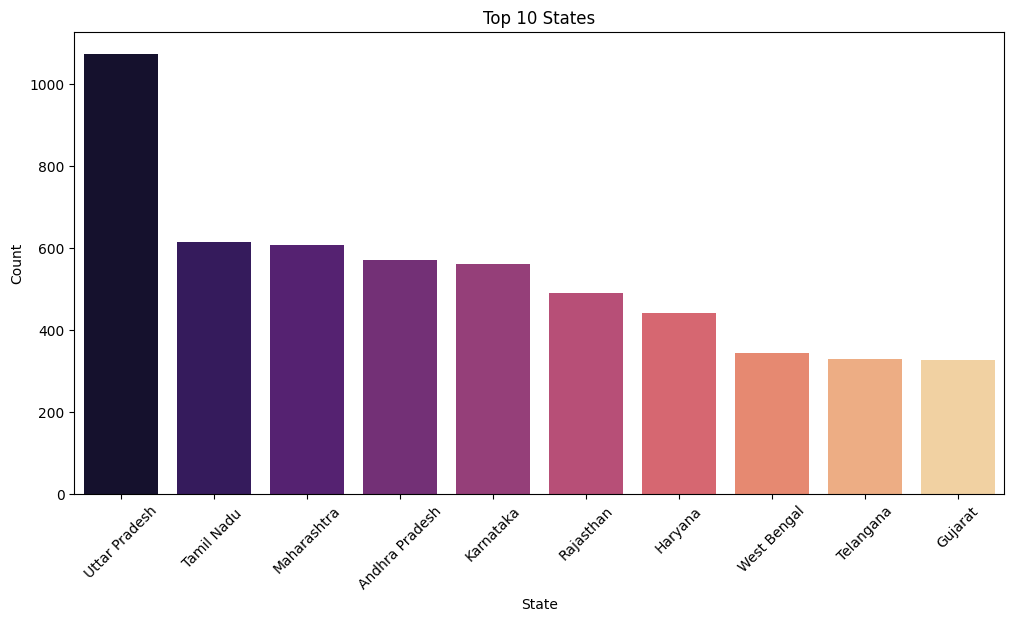

In [6]:

# 3. Top 10 Cities
plt.figure(figsize=(12,6))
top_cities = df['City'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.title("Top 10 Cities")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.savefig("top_cities.png")
plt.show()

# 4. Top 10 States
plt.figure(figsize=(12,6))
top_states = df['State'].value_counts().nlargest(10)
sns.barplot(x=top_states.index, y=top_states.values, palette="magma")
plt.title("Top 10 States")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.savefig("top_states.png")
plt.show()


<ipython-input-8-c70ef0e6e61c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_charges.index, y=top_charges.values, palette="coolwarm")


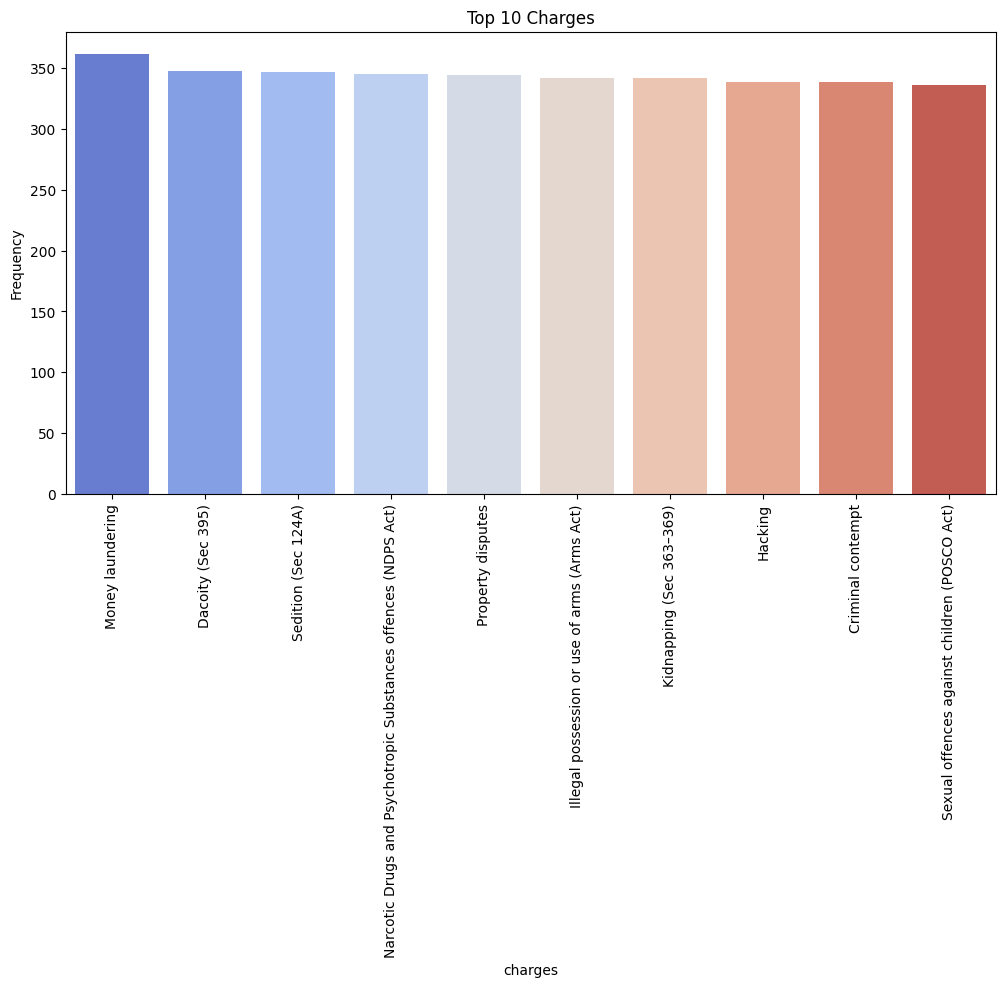

In [8]:

# 5. Top 10 Most Frequent Charges
all_charges = df['charges'].str.split(", ").explode()
plt.figure(figsize=(12,6))
top_charges = all_charges.value_counts().nlargest(10)
sns.barplot(x=top_charges.index, y=top_charges.values, palette="coolwarm")
plt.title("Top 10 Charges")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.savefig("top_charges.png")
plt.show()


In [9]:

# Combine useful features into a single text field.
def create_feature(row):
    # Convert Age to string so we can combine all fields.
    return f"{row['gender']} {row['City']} {row['State']} {row['Age']} {row['charges']}"

df['features'] = df.apply(create_feature, axis=1)


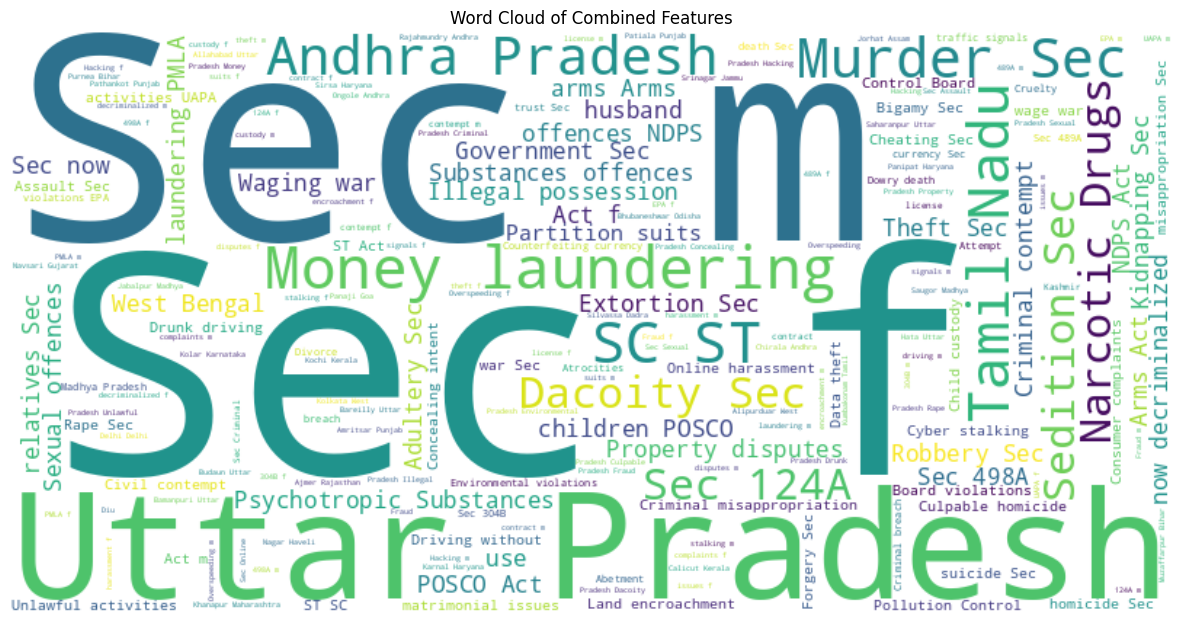

In [10]:

# WordCloud for the combined features.
all_text = " ".join(df['features'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Combined Features")
plt.savefig("features_wordcloud.png")
plt.show()


In [11]:

tfidf = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf_matrix = tfidf.fit_transform(df['features'])



In [12]:
# Compute the cosine similarity matrix.
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [13]:

# A function to get recommendations.
def get_recommendations(name, cosine_sim=cosine_sim, df=df, top_n=5):
    indices = pd.Series(df.index, index=df['name']).drop_duplicates()
    if name not in indices:
        return f"Name '{name}' not found in the dataset."
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    recommendation_indices = [i[0] for i in sim_scores]
    return df.iloc[recommendation_indices]['name']


In [14]:

# Test the recommendation function.
test_name = df.iloc[0]['name']
recommended = get_recommendations(test_name)
print(f"Recommendations for {test_name}:")
print(recommended)



Recommendations for anjali sangwar:
6766    ravi bhushan
410        smt momin
5670      varda khan
6379       neha_30.0
5506      hakimuddin
Name: name, dtype: object


In [15]:

joblib.dump(tfidf, r"\content\tfidf_vectorizer.joblib")
joblib.dump(cosine_sim, r"\content\cosine_similarity_matrix.joblib")

print("TF-IDF vectorizer and cosine similarity matrix have been saved using joblib.")

TF-IDF vectorizer and cosine similarity matrix have been saved using joblib.
